## Employee Turnover Analytics - ML Project 

In [13]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [14]:
data = pd.read_csv('HR_comma_sep.csv')

In [15]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [16]:
#checking datatypes 
data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

### 1. checking for missing values if any

In [17]:
# checking missing data
missing_data = data.isnull().sum()

# counting number of rows
row_number = len(data)

# non_missing_data
non_missing_data =data.notna().sum()
print(f'Total no. of rows:{row_number}\n\nMissing Data:\n{missing_data}\n\nNon-missing Data:\n{non_missing_data}')

Total no. of rows:14999

Missing Data:
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

Non-missing Data:
satisfaction_level       14999
last_evaluation          14999
number_project           14999
average_montly_hours     14999
time_spend_company       14999
Work_accident            14999
left                     14999
promotion_last_5years    14999
sales                    14999
salary                   14999
dtype: int64


### 2.	Understand what factors contributed most to employee turnover by EDA.- 2.1. 	Draw a heatmap of the Correlation Matrix between all numerical features/columns in the data.


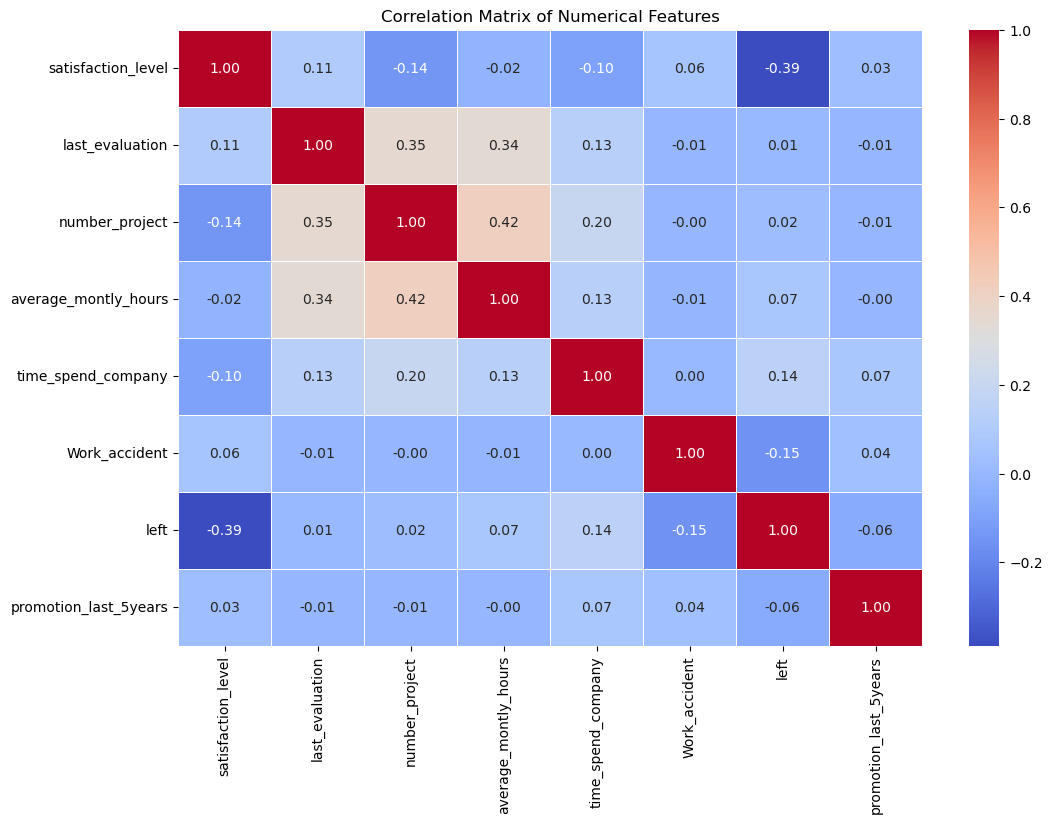

In [18]:
# selecting only the numerical columns for correlation analysis
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Calculating  correlation matrix
correlation_matrix = numerical_data.corr()

# Plotting heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


### 2.2.	Draw the distribution plot of 
- Employee Satisfaction (use column satisfaction_level)- 	Employee Evaluation (use column last_evaluation)- •	Employee Average Monthly Hou s (use column average_montly_hour)
s)


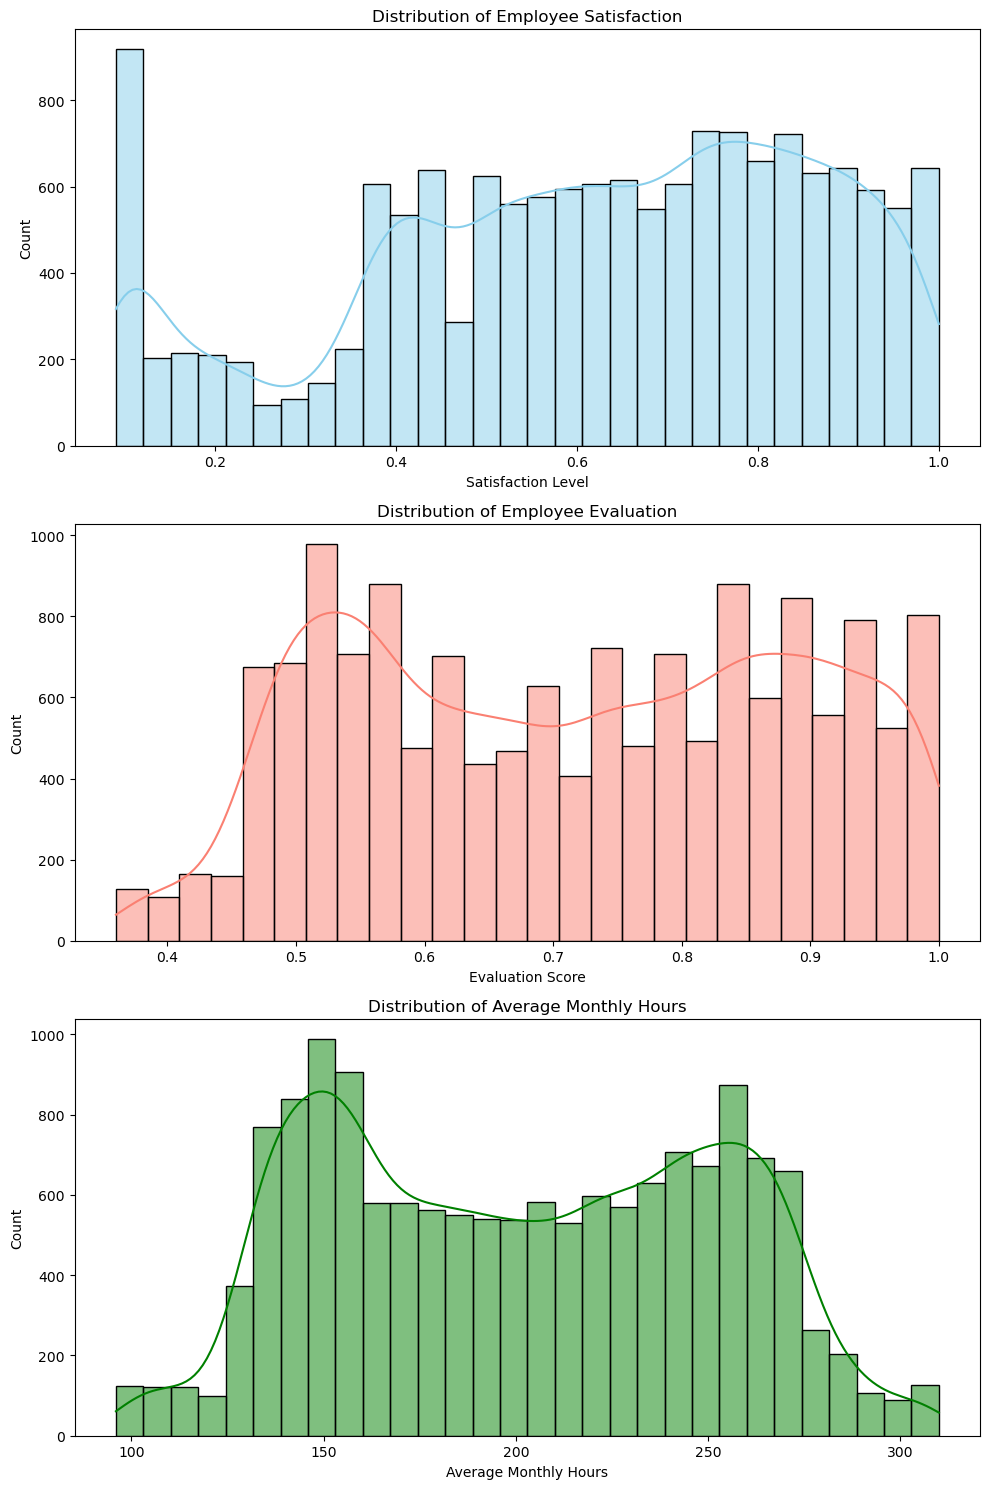

In [51]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Distribution plot for Employee Satisfaction
sns.histplot(data['satisfaction_level'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Employee Satisfaction')
axes[0].set_xlabel('Satisfaction Level')

# Distribution plot for Employee Evaluation
sns.histplot(data['last_evaluation'], kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Distribution of Employee Evaluation')
axes[1].set_xlabel('Evaluation Score')

# Distribution plot for Average Monthly Hours
sns.histplot(data['average_montly_hours'], kde=True, ax=axes[2], color='green')
axes[2].set_title('Distribution of Average Monthly Hours')
axes[2].set_xlabel('Average Monthly Hours')

# Adjusting  layout
plt.tight_layout()
plt.show()

### 2.3.	Draw the bar plot of Employee Project Count of both employees who left and who stayed in the organization (use column number_project and hue column left)  and give your inferences from the plot.

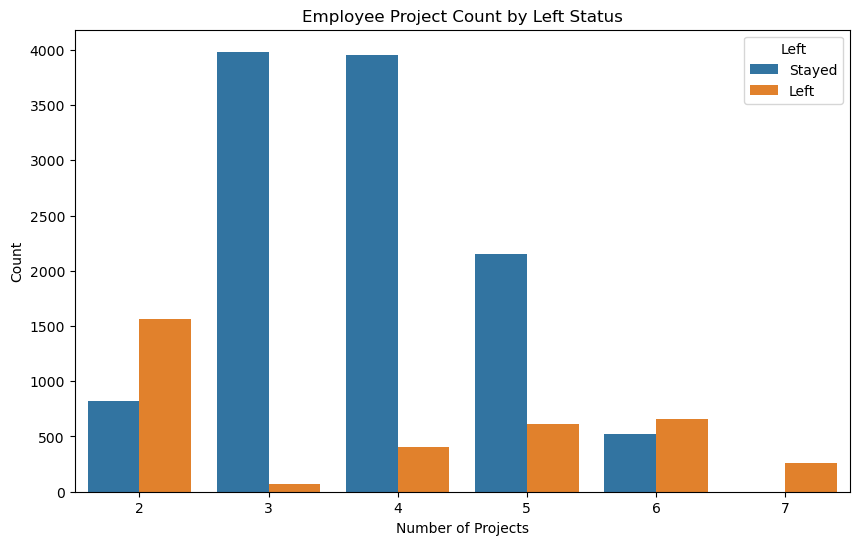

In [52]:
# Setting  up the figure
plt.figure(figsize=(10, 6))

# Bar plot of Employee Project Count with hue for left status
sns.countplot(data=data, x='number_project', hue='left')
plt.title('Employee Project Count by Left Status')
plt.xlabel('Number of Projects')
plt.ylabel('Count')

# Showing plot
plt.legend(title='Left', labels=['Stayed', 'Left'])
plt.show()


### 3.	Perform clustering of Employees who left based on their satisfaction and evaluation
- 3.1.	Choose columns satisfaction_level, last_evaluation and left.
- 3.2.	Do KMeans clustering of employees who left the company into 3 clusters.

Centroids of the clusters:
[[0.41014545 0.51698182]
 [0.80851586 0.91170931]
 [0.11115466 0.86930085]]


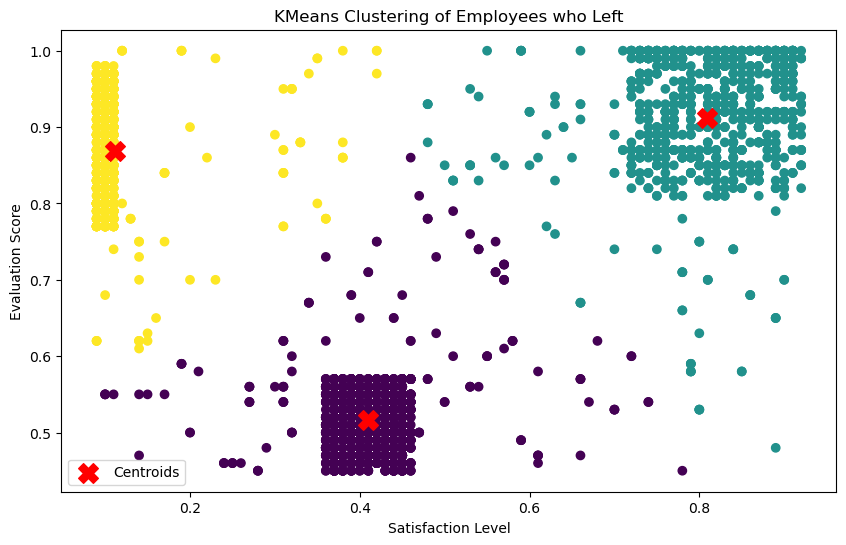

In [53]:
from sklearn.cluster import KMeans

# Selecting the columns satisfaction_level, last_evaluation, and left
cluster_data = data[data['left'] == 1][['satisfaction_level', 'last_evaluation']]

# Performing KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(cluster_data)

# Adding cluster labels to the dataframe
cluster_data['cluster'] = kmeans.labels_

# Print the centroids of the clusters
print("Centroids of the clusters:")
print(kmeans.cluster_centers_)

# Visualizing the clusters
plt.figure(figsize=(10, 6))
plt.scatter(cluster_data['satisfaction_level'], cluster_data['last_evaluation'], c=cluster_data['cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.title('KMeans Clustering of Employees who Left')
plt.xlabel('Satisfaction Level')
plt.ylabel('Evaluation Score')
plt.legend()
plt.show()


###  3.3.	Based on the satisfaction and evaluation factors, give your thoughts on the employee clusters


- Cluster 1: Low satisfaction and low evaluation. Employees may have felt undervalued and disengaged, leading to their departure.
- Cluster 2: High satisfaction but still left. They might have been satisfied but left for better career opportunities or work-life balance.
- Cluster 3: Moderate satisfaction with mixed evaluation scores. Reasons for leaving could vary, including dissatisfaction with certain aspects of their role or the company.

In summary, Cluster 1 felt undervalued, Cluster 2 left for better opportunities, and Cluster 3 had mixed reasons for leaving.

### 4.	Handle the left Class Imbalance using SMOTE technique.
  - #### 	Pre-Process the data by converting categorical columns to numerical columns by    - ####  	Separating categorical variables and numeric variabless.


In [54]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Splittng features and target variable
X = data.drop(columns=['left'])
y = data['left']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Separating categorical and numeric features
categorical_features = X.select_dtypes(include=['object']).columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns

# Separating categorical and numerical data
X_train_categorical = X_train[categorical_features]
X_train_numeric = X_train[numeric_features]

# Applying SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_numeric, y_train)

X_train_resampled, y_train_resampled


(       satisfaction_level  last_evaluation  number_project  \
 0                1.000000         0.610000               3   
 1                0.160000         0.780000               4   
 2                0.800000         0.800000               3   
 3                0.660000         0.860000               4   
 4                0.110000         0.930000               7   
 ...                   ...              ...             ...   
 18263            0.447435         0.542565               2   
 18264            0.829375         0.946562               4   
 18265            0.360157         0.499371               2   
 18266            0.102596         0.920000               6   
 18267            0.460000         0.540000               2   
 
        average_montly_hours  time_spend_company  Work_accident  \
 0                       188                   4              0   
 1                       196                   5              0   
 2                       175             

 -  ###  Applying get_dummies() to the categorical variables.

In [55]:
# Separating categorical and numerical variables
numeric_variables = data.select_dtypes(include=['int64', 'float64']).columns
categorical_variables = data.select_dtypes(include=['object']).columns

# Applying get_dummies to categorical variables
data_with_dummies = pd.get_dummies(data, columns=categorical_variables)

# Separating the dummy variables and numeric variables
dummy_variables = data_with_dummies.drop(columns=numeric_variables)
numeric_variables = data_with_dummies[numeric_variables]

print("Dummy Variables:")
print(dummy_variables.head())
print("\nNumeric Variables:")
print(numeric_variables.head())


Dummy Variables:
   sales_IT  sales_RandD  sales_accounting  sales_hr  sales_management  \
0         0            0                 0         0                 0   
1         0            0                 0         0                 0   
2         0            0                 0         0                 0   
3         0            0                 0         0                 0   
4         0            0                 0         0                 0   

   sales_marketing  sales_product_mng  sales_sales  sales_support  \
0                0                  0            1              0   
1                0                  0            1              0   
2                0                  0            1              0   
3                0                  0            1              0   
4                0                  0            1              0   

   sales_technical  salary_high  salary_low  salary_medium  
0                0            0           1              0  
1

-  ###   Combining categorical variables and numeric variables.

In [56]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report

# Splitting features and target variable
X = data.drop(columns=['left'])
y = data['left']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining numeric and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Preprocessing for numerical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combining  preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Applying preprocessing to training data
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Applying SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_preprocessed, y_train)

# Applying preprocessing to test data
X_test_preprocessed = preprocessor.transform(X_test)
preprocessor






ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['sales', 'salary'], dtype='object'))])

#### 4.2.	Do the stratified split of the dataset to train and test in the ratio 80:20 with random_state=123.

In [57]:
from sklearn.model_selection import train_test_split

# Performing stratified split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=123)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)



Shape of X_train: (11999, 9)
Shape of X_test: (3000, 9)
Shape of y_train: (11999,)
Shape of y_test: (3000,)


 #### 4.3.	Upsample the train dataset using SMOTE technique from the imblearn module.

In [58]:
# Converting column names to strings
X_train.columns = X_train.columns.astype(str)

# Separating numerical and categorical columns
numerical_columns = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = X_train.select_dtypes(include=['object']).columns

# Instantiate the OneHotEncoder
encoder = OneHotEncoder()

# Fitting and transforming the categorical columns
X_train_encoded = encoder.fit_transform(X_train[categorical_columns])

# Converting the encoded features to a DataFrame with column names
encoded_column_names = encoder.get_feature_names_out(input_features=categorical_columns)
X_train_encoded_df = pd.DataFrame(X_train_encoded.toarray(), columns=encoded_column_names)

# Combining the encoded categorical columns with the numerical columns
X_train_combined = pd.concat([X_train_encoded_df, X_train[numerical_columns].reset_index(drop=True)], axis=1)

# Upsampling the combined dataset
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_combined, y_train)

# Print the shapes of the resampled dataset
print("Shape of X_train_resampled:", X_train_resampled.shape)
print("Shape of y_train_resampled:", y_train_resampled.shape)

# Displaying the resampled dataset
print("Resampled Dataset:")
print(X_train_resampled.head())


Shape of X_train_resampled: (18284, 20)
Shape of y_train_resampled: (18284,)
Resampled Dataset:
   sales_IT  sales_RandD  sales_accounting  sales_hr  sales_management  \
0       0.0          0.0               0.0       0.0               0.0   
1       0.0          0.0               0.0       0.0               0.0   
2       0.0          0.0               0.0       0.0               0.0   
3       0.0          0.0               0.0       0.0               0.0   
4       0.0          0.0               0.0       0.0               0.0   

   sales_marketing  sales_product_mng  sales_sales  sales_support  \
0              0.0                0.0          1.0            0.0   
1              0.0                0.0          0.0            1.0   
2              0.0                0.0          0.0            1.0   
3              0.0                0.0          0.0            1.0   
4              0.0                0.0          1.0            0.0   

   sales_technical  salary_high  salary_low 

### 5.	Perform 5-Fold cross-validatiozn model training and evaluate performance. 

In [59]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
logistic_model = LogisticRegression()

# Performing 5-Fold Cross-Validation
scores = cross_val_score(logistic_model, X_train_resampled, y_train_resampled, cv=5)
print("Cross-Validation Scores:", scores)
print("Mean CV Score:", scores.mean())

# Training the model
logistic_model.fit(X_train_resampled, y_train_resampled)

# Making predictions on the training data
y_pred_train = logistic_model.predict(X_train_resampled)

# Generating the classification report
report = classification_report(y_train_resampled, y_pred_train)

print("Classification Report:")
print(report)


Cross-Validation Scores: [0.76893629 0.77331146 0.76893629 0.788898   0.79212254]
Mean CV Score: 0.7784409145495375
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.75      0.77      9142
           1       0.76      0.80      0.78      9142

    accuracy                           0.78     18284
   macro avg       0.78      0.78      0.78     18284
weighted avg       0.78      0.78      0.78     18284



- #### 5.1.	Train a Logistic Regression model and apply a 5-Fold CV and plot the classification report.

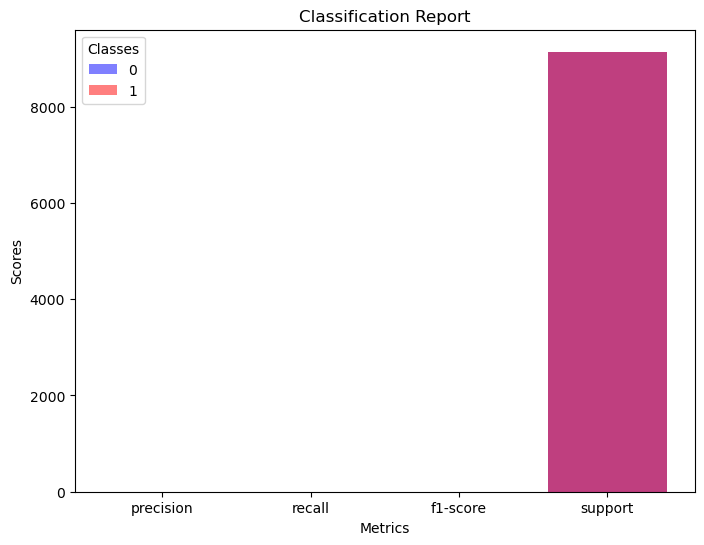

In [60]:
from sklearn.model_selection import StratifiedKFold

# Defining the Logistic Regression model
model = LogisticRegression()

# Defining the cross-validation strategy (5-Fold)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

# Performing cross-validation and collect predictions
y_pred = cross_val_predict(model, X_train_resampled, y_train_resampled, cv=cv)

# Calculating the classification report
report = classification_report(y_train_resampled, y_pred, output_dict=True)

# Plotting the classification report
plt.figure(figsize=(8, 6))
plt.bar(report['0'].keys(), report['0'].values(), color='blue', alpha=0.5, label='0')
plt.bar(report['1'].keys(), report['1'].values(), color='red', alpha=0.5, label='1')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Classification Report')
plt.legend(title='Classes')
plt.show()


- #### 5.2.	Train a Random Forest Classifier model and apply the 5-Fold CV and plot the classification report.

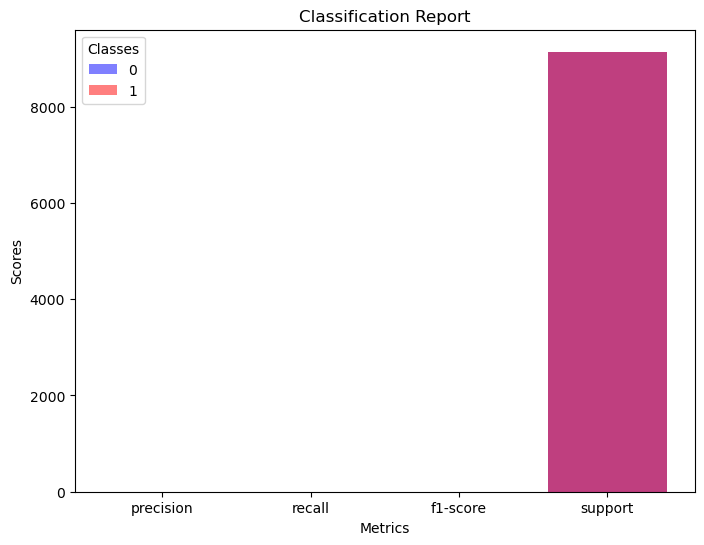

In [61]:
# Defining the Random Forest Classifier model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

# Defining the cross-validation strategy (5-Fold)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

# Performing cross-validation and collect predictions
y_pred = cross_val_predict(model, X_train_resampled, y_train_resampled, cv=cv)

# Calculating the classification report
report = classification_report(y_train_resampled, y_pred, output_dict=True)

# Plotting  the classification report
plt.figure(figsize=(8, 6))
plt.bar(report['0'].keys(), report['0'].values(), color='blue', alpha=0.5, label='0')
plt.bar(report['1'].keys(), report['1'].values(), color='red', alpha=0.5, label='1')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Classification Report')
plt.legend(title='Classes')
plt.show()


- #### 5.3.	Train a  Gradient Boosting Classifier model and apply the 5-Fold CV and plot the classification report.

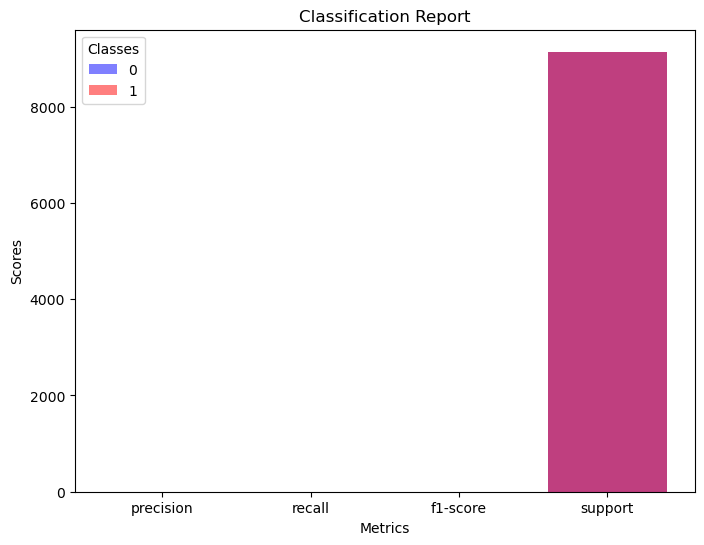

In [62]:
from sklearn.ensemble import GradientBoostingClassifier

# Defining the Gradient Boosting Classifier model
model = GradientBoostingClassifier()

# Defining the cross-validation strategy (5-Fold)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

# Performing cross-validation and collect predictions
y_pred = cross_val_predict(model, X_train_resampled, y_train_resampled, cv=cv)

# Calculating  the classification report
report = classification_report(y_train_resampled, y_pred, output_dict=True)

# Plotting the classification report
plt.figure(figsize=(8, 6))
plt.bar(report['0'].keys(), report['0'].values(), color='blue', alpha=0.5, label='0')
plt.bar(report['1'].keys(), report['1'].values(), color='red', alpha=0.5, label='1')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Classification Report')
plt.legend(title='Classes')
plt.show()


### 6.	Identify the best model and justify the evaluation metrics used.  
#### 
6.1.	Find the ROC/AUC for each model and plot the ROC curve


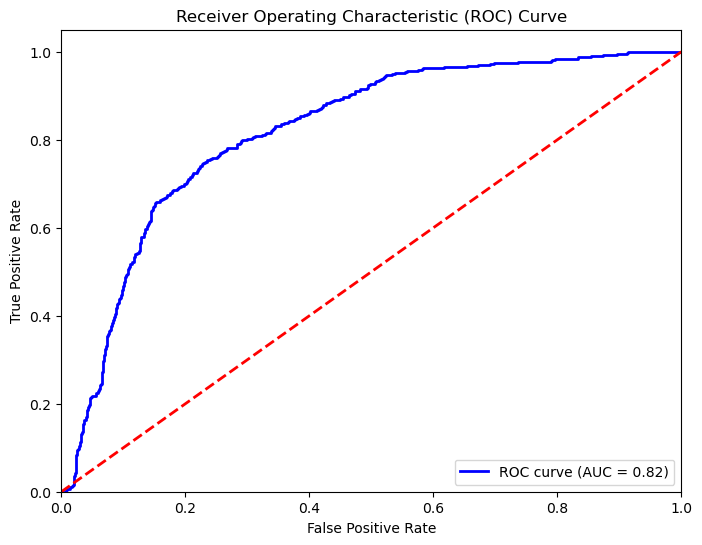

In [63]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Defining numeric and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Preprocessing for numerical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Defining logistic regression model
logistic_regression_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())])

# Training the model
logistic_regression_model.fit(X_train, y_train)

# Plotting ROC curve
def plot_roc_curve(model, X_test, y_test):
    # Get predicted probabilities
    y_prob = model.predict_proba(X_test)[:, 1]

    # Calculating ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)

    # Calculating AUC score
    auc = roc_auc_score(y_test, y_prob)

    # Plotting ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc))
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

# Plotting ROC curve for logistic regression model
plot_roc_curve(logistic_regression_model, X_test, y_test)


### 6.2.	Find the confusion matrix for each of the models.

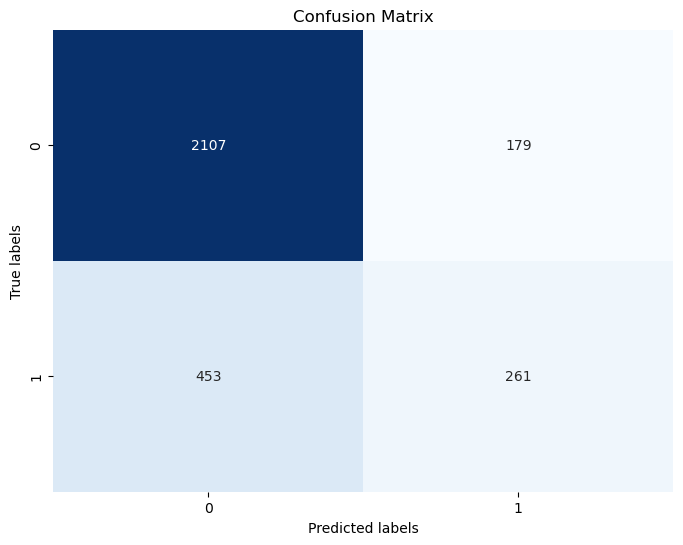

In [64]:
from sklearn.metrics import confusion_matrix

# Functioning  to plot confusion matrix
def plot_confusion_matrix(model, X_test, y_test):
    # Predict
    y_pred = model.predict(X_test)
    
    # Calculating confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plotting confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

# Plotting confusion matrix for logistic regression model
plot_confusion_matrix(logistic_regression_model, X_test, y_test)


### 6.3.	From the confusion matrix, explain which metric needs to be used- Recall or Precision?
- Recall- Focuses on minimizing missed positive cases (false negatives). Use it when it's critical to catch all positive instances, like in medical diagnoses.
  
- Precision -Focuses on minimizing false alarms (false positives). Use it when it's crucial to avoid incorrectly classifying negatives as positives, like in spam email detection.

So, if you want to make sure you're catching as many positive cases as possible, prioritize recall. If you want to minimize false alarms and be confident in your positive predictions, prioritize precision.

### 7.	Suggest various retention strategies for targeted employees.
-  #### 7.1.	Using the best model, predict the probability of employee turnover in the test data.


In [65]:
# Loading the best model
best_model = logistic_regression_model  # replace this with your best model

# Using the model to predict the probability of employee turnover for the test data
predicted_probabilities = best_model.predict_proba(X_test)

# Displaying the predicted probabilities
print("Predicted probabilities of employee turnover:")
print(predicted_probabilities)


Predicted probabilities of employee turnover:
[[0.9590103  0.0409897 ]
 [0.53251617 0.46748383]
 [0.79659787 0.20340213]
 ...
 [0.89573957 0.10426043]
 [0.88225913 0.11774087]
 [0.8152977  0.1847023 ]]


### 7.2.	Based on the below probability score range, categorize the employees into four zones and suggest your thoughts on the retention strategies for each zone.
- Safe Zone (Green) (Score < 20%)
- Low Risk Zone (Yellow) (20% < Score < 60%)
- Medium Risk Zone (Orange) (60% < Score < 90%)
- High Risk Zone (Red) (Score > 90%).


In [66]:
# Defining probability score ranges for each zone
safe_zone_threshold = 0.2
low_risk_zone_lower_threshold = 0.2
low_risk_zone_upper_threshold = 0.6
medium_risk_zone_lower_threshold = 0.6
medium_risk_zone_upper_threshold = 0.9
high_risk_zone_threshold = 0.9

# Sampling predicted probabilities (replace with your actual predicted probabilities)
predicted_probabilities = np.random.rand(100)

# Categorizing employees into the respective zones
employee_zones = []
for probability in predicted_probabilities:
    if probability < safe_zone_threshold:
        employee_zones.append("Safe Zone")
    elif low_risk_zone_lower_threshold < probability < low_risk_zone_upper_threshold:
        employee_zones.append("Low Risk Zone")
    elif medium_risk_zone_lower_threshold < probability < medium_risk_zone_upper_threshold:
        employee_zones.append("Medium Risk Zone")
    else:
        employee_zones.append("High Risk Zone")

# Displaying the categorized zones
for i, zone in enumerate(employee_zones):
    print(f"Employee {i+1} is in the {zone}. Probability: {predicted_probabilities[i]}")

# Suggesting retention strategies for each zone
for i, zone in enumerate(employee_zones):
    if zone == "Safe Zone":
        print(f"Employee {i+1} is in the Safe Zone. Retention strategy: Recognize and reward achievements to maintain satisfaction.")
    elif zone == "Low Risk Zone":
        print(f"Employee {i+1} is in the Low Risk Zone. Retention strategy: Provide opportunities for growth and development to increase engagement.")
    elif zone == "Medium Risk Zone":
        print(f"Employee {i+1} is in the Medium Risk Zone. Retention strategy: Conduct regular check-ins and address any concerns to prevent turnover.")
    else:
        print(f"Employee {i+1} is in the High Risk Zone. Retention strategy: Take immediate action to address issues and offer support to prevent turnover.")


Employee 1 is in the Medium Risk Zone. Probability: 0.6090639334087528
Employee 2 is in the Medium Risk Zone. Probability: 0.7822649003886812
Employee 3 is in the Safe Zone. Probability: 0.1624287753163467
Employee 4 is in the Low Risk Zone. Probability: 0.22064011213509238
Employee 5 is in the Low Risk Zone. Probability: 0.49658055515556987
Employee 6 is in the Medium Risk Zone. Probability: 0.8678769410616785
Employee 7 is in the Low Risk Zone. Probability: 0.26325036957823544
Employee 8 is in the Medium Risk Zone. Probability: 0.7867499549935294
Employee 9 is in the Medium Risk Zone. Probability: 0.6252731601844265
Employee 10 is in the Medium Risk Zone. Probability: 0.7535611415603498
Employee 11 is in the Safe Zone. Probability: 0.02207831864328691
Employee 12 is in the High Risk Zone. Probability: 0.9599373286231196
Employee 13 is in the Medium Risk Zone. Probability: 0.7028207962345895
Employee 14 is in the Safe Zone. Probability: 0.0619515333016073
Employee 15 is in the Low Ris

### Thanks,
#### Moirangmayum Ronaldo